Avtor: **Nikola Vukas, 23190626**

Datum: 18. januar 2021.

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definicija-Naloge" data-toc-modified-id="Definicija-Naloge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definicija Naloge</a></span><ul class="toc-item"><li><span><a href="#Knjižnice:" data-toc-modified-id="Knjižnice:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Knjižnice:</a></span></li><li><span><a href="#PandasBasketball:" data-toc-modified-id="PandasBasketball:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PandasBasketball:</a></span></li></ul></li><li><span><a href="#Simbolno-reševanje" data-toc-modified-id="Simbolno-reševanje-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simbolno reševanje</a></span></li><li><span><a href="#Sistem-linearnih-enacb" data-toc-modified-id="Sistem-linearnih-enacb-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sistem linearnih enacb</a></span></li><li><span><a href="#Interpolacija/Aproksimacija" data-toc-modified-id="Interpolacija/Aproksimacija-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interpolacija/Aproksimacija</a></span></li><li><span><a href="#Integriranje/Odvajanje" data-toc-modified-id="Integriranje/Odvajanje-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Integriranje/Odvajanje</a></span></li><li><span><a href="#Diferencialne-enačbe" data-toc-modified-id="Diferencialne-enačbe-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Diferencialne enačbe</a></span></li><li><span><a href="#Iskanje-ničel" data-toc-modified-id="Iskanje-ničel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Iskanje ničel</a></span></li><li><span><a href="#NBA-met" data-toc-modified-id="NBA-met-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>NBA met</a></span></li></ul></div>

# Definicija Naloge

<img src="Uvod.jpg">

Košarka je tretji najbolj gledan šport na svetu in tudi moj najljubši. Za moj projekt ni bilo enostavno izbrati samo eno nalogo, zato sem se odločil izbrati eno temo, NBA, s katero bom pokazal znanje, ki sem ga pridobil v tem semestru. Skozi ta projekt boste srečali moje najljubše igralce lige in videli, kako se njihove dejavnosti prepletajo s numeričnimi metodami, ki smo jih preučevali.

Spodaj so vse knjižnice, ki sem jih uporabljal med projektom in je najbolj smiselno začeti z njimi:


## Knjižnice:

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import newton
from ipywidgets import interact

## PandasBasketball:

Uporabil sem tudi fenomenalen vir paketov za pyton pypi.org. S te spletne strani sem prenesel paket PandasBasketball. Najprej moramo instalirati ta!

In [ ]:
pip install PandasBasketball

In [2]:
from PandasBasketball import pandasbasketball as pb

#  Simbolno reševanje

Zabijanje je ena od najprivlačnejših dejavnosti v ligi NBA. Vstopili smo v obdobje košarke, kje lahko tudi otroci v srednji šoli zabijajo kot profesionalci, ampak eden je edini Vince Carter. Carter je novinec 1998–1999. sezone,  olimpijski zlati medalist in osemkratni All-Star igralec. Razen vseh teh neverjetnih statistik velja za enega od najboljših zabijateljev v NBA ligi. Leta 2000 je zmagal na NBA All-Star Dunk Contest-u in se s tem pokazal kot eno od najboljših. V svojem nastopu je imel, med drugimi neverjetnimi zabijanjimi, tudi 360 ° Windmill Dunk. To je zabijanje katero bomo analizirali za prvi del mojega projekta.

In [3]:
from IPython.display import Image
Image(url='Vince.gif', width = 900)  

V tem zabijanju imamo jasen primer krožnega gibanja košarkaške NBA žoge. Moja ideja je bila izračunati centripetalno silo košarke žoge.

Najprej sem moral najti polmer vrtenja. Iz gif-a je razvidno, da je polmer krožnega kretanja dolžina Vince-ove roke. Za izračun njegove roke sem moral najprej ugotoviti njegovo višino. Na Googlu sem s preprostim iskanjem dobil informacijo, da je Vince Carter visok  **1,98 m**!

Na podlagi razmerja med mojo višino in dolžino roke sem izračunal dolžino njegove roke. Za preverjanje rezultatov bom uporabil tudi meritve moga prijatelja Rastka:

$$ Višine: $$ 
$$ Nikola: h_{N} = 1.81m $$
$$ Rastko: h_{R} = 1.85m $$
$$ Vince: h_{V} = 1.98m  $$
$$ Roke: $$
$$ Nikola: r_{N} = 0.78m $$
$$ Rastko: r_{R} = 0.8m $$
$$ Vince: r_{V} = ? $$






In [3]:
# Prvo bom definiral simbole katere bom uporabil za izračun dolžine Carter-jeve roke.

r_N, r_V, r_R = sym.symbols('r_N r_V r_R')
h_N, h_V, h_R = sym.symbols('h_N h_V h_R')

In [4]:
# Napišemo kako bo izgledalo razmerje.

Razmerje_N = sym.Eq(r_N/r_V, h_N/h_V )
display(Razmerje_N)

Eq(r_N/r_V, h_N/h_V)

In [5]:
# Preoblikujemo enačbo kako bi izračunali dolžino roke Vince-a.

Enacba_N = sym.solve(Razmerje_N, r_V)[0]
display(sym.Eq(r_V, Enacba_N))

Eq(r_V, h_V*r_N/h_N)

In [6]:
# Simbolno izračunamo.

Podatki_N = { r_N : 0.78, h_N : 1.81, h_V : 1.98 } #Naredimo seznam podatkov katere vstavimo v enačbo in uporabimo .subs.
display(sym.Eq(r_V, Enacba_N.subs(Podatki_N)))

Eq(r_V, 0.853259668508287)

In [7]:
print(f'Glede na razmerje mojega telesa je njegova roka  ≈ {Enacba_N.subs(Podatki_N):.2} m!')

Glede na razmerje mojega telesa je njegova roka  ≈ 0.85 m!


In [8]:
# Sedaj bom uporabil enak postopek kako bi izračunal na primeru Rastka.

Razmerje_R = sym.Eq(r_R/r_V, h_R/h_V )
Podatki_R = { r_R : 0.8, h_R : 1.85, h_V : 1.98 }
Enacba_R = sym.solve(Razmerje_R, r_V)[0]
print(f'Glede na razmerje telesa mojega prijatelja je njegova roka ≈ {Enacba_R.subs(Podatki_R):.2} m!')

Glede na razmerje telesa mojega prijatelja je njegova roka ≈ 0.86 m!


Vidimo, da smo dobili zelo podoben rezultat, zato bom za nadaljnji izračun uporabil dolžino, ki sem jo dobil na podlagi svojih meritev. Naslednji korak je zapis enačb, ki jih potrebujemo za izračun centripetalne sile:

In [9]:
# Napišemo simbole katere bomo potrebovali v enačbah.

v_t, r, a_c, t, F_c, m_l = sym.symbols('v_t r a_c t F_c m_l')

In [10]:
# Pokažemo enačbo za centripetalno silo.

Centripetalna_sila_enacba = sym.Eq(F_c, m_l*a_c)
display(Centripetalna_sila_enacba)

Eq(F_c, a_c*m_l)

In [11]:
# Pokažemo enačbo za tangencialno hitrost.

Hitrost_enacba = sym.Eq(v_t, 2*sym.pi*r_V/t)
display(Hitrost_enacba)

Eq(v_t, 2*pi*r_V/t)

Vidimo, da je v enačbi ena od neznank čas **t**. Za izračun sem si večkrat ogledal video posnetek Vince-a. Ta korak je vzrok za večino napak, ker ni bilo možno vedno dobiti enak čas. Začel sem meriti, ko se je Carter-jeva roka začela vrteti, in končal, ko je njegova roka udarila rob. **Pri preračunu ne bom upošteval njegovo rotacijo ampak samo rotacijo žoge kot idealno.**

<img src="Poz1.jpg">
<img src="Poz2.jpg">


Pogledajmo si meritve:

In [12]:
# Časi tukaj predstavljajo Čase katere sem eksperimentalno dobil. Masa m je masa NBA žoge.

t_1 = 1.77 #s
t_2 = 1.83 #s
t_3 = 1.65 #s
t_4 = 1.69 #s
t_5 = 1.80 #s
m = 0.6237 #kg

Kako bi pravilno dobil meritve sem na YouTube-u hitrost posnetka zmanjšal na 0.25. Časi zgoraj so usporjeni časi katere sedaj bom preoblikoval v prave čase in najdel njihovo povprečje. U enačbi za tangencialno hitrost je potrebno da vstavimo čas ene rotacije. Zgoraj tudi vidimo da smo merili približno 3/4 rotacije in zaradi tega bom povprečje meritve delil s 0.75:

In [13]:
Usporjene_meritve = np.array([t_1, t_2, t_3, t_4, t_5])

Prave_meritve = Usporjene_meritve * 0.25
t_povp = np.mean(Prave_meritve)/0.75

print(f'Povprečje meritev je {t_povp}s!')

Povprečje meritev je 0.5826666666666667s!


In [14]:
# Sedaj imamo vse potrebne podatke za izračun tangencialne hitrosti.

Podatki_v = {r_V : 0.85, t : t_povp}  # Zamenjava podatkov.
Hitrost_v = sym.solve(Hitrost_enacba.subs(Podatki_v))[0]
display(sym.Eq(v_t, Hitrost_v))

Eq(v_t, 9.1659739893066)

In [15]:
# Zapišemo enačbo za centripetalni pospešek.

Pospesek_enacba = sym.Eq(a_c, v_t**2/r_V)
display(Pospesek_enacba)

Eq(a_c, v_t**2/r_V)

In [16]:
# Vse podatke imamo na voljo.

Podatki_a = {r_V : 0.85, v_t : Hitrost_v} # Seznam podatkov.
Pospesek_c = sym.solve(Pospesek_enacba.subs(Podatki_a))[0]
display(sym.Eq(a_c,Pospesek_c))

Eq(a_c, 98.8412696148767)

In [17]:
# Na koncu uporabimo centripetalni pospešek in izračunamo silo!

Podatki_F = {m_l : m, a_c : Pospesek_c} # Seznam podatkov.
Centripetalna_sila = sym.solve(Centripetalna_sila_enacba.subs(Podatki_F))[0]
display(sym.Eq(F_c, Centripetalna_sila))

Eq(F_c, 61.6472998587986)

In [18]:
print(f'Centripetalna sila žoge je {Centripetalna_sila:.5}N!')

Centripetalna sila žoge je 61.647N!


# Sistem linearnih enacb

<img src="luka-trae.jpg">


Vedno je zanimivo gledati novince ki igrajo prve tekme v ligi NBA, in videti kako dobri so pravzaprav. Prvi novinec leta, ki ga je NBA uradno priznal, je bil Monk Meineke v sezoni 1952-53, od takrat pa jih NBA ima še veliko več. Michael Jordan, Allen Iverson in LeBron James so nekateri od najboljših igralcev vseh časov in kaj imajo skupnega? Vsi so prejeli nagrado za NBA novinca leta! Elitni skupini se je leta 2019 pridružil mladi Slovenec, in moj najljubši igralec Luka Dončić. V sezoni 2018-2019. za nagrado so bili nominirani trije igralci: Luka Dončić, Trae Young in Deandre Ayton. V tem delu svojega projekta si bom ogledal nekatere njihove statistične podatke in ugotovil, zakaj je Luka zmagal!

In [19]:
# Bom uporabil knjižnico PandasBasketball kako bi pokazal statistiko igralcev.

DONCIC_STAT = pb.get_player(pb.generate_code("Luka Doncic"), "totals")
DONCIC_STAT

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,,Trp Dbl
0,2018-19,19,DAL,NBA,SG,72,72,2318,506,1186,...,477,563,429,77,25,247,137,1526,,8
1,2019-20,20,DAL,NBA,PG,61,61,2047,581,1255,...,495,573,538,62,14,260,153,1759,,17
2,2020-21,21,DAL,NBA,PG,10,10,342,99,211,...,88,96,88,11,9,43,18,275,,3


In [20]:
TRAE_STAT = pb.get_player(pb.generate_code("Trae Young"), "totals")
TRAE_STAT

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,,Trp Dbl
0,2018-19,20,ATL,NBA,PG,81,81,2503,525,1256,...,237,301,653,72,15,308,140,1549,,1
1,2019-20,21,ATL,NBA,PG,60,60,2120,546,1249,...,223,255,560,65,8,289,104,1778,,2
2,2020-21,22,ATL,NBA,PG,12,12,393,80,207,...,37,50,103,6,2,50,22,278,,0


In [21]:
AYTON_STAT = pb.get_player(pb.generate_code("Deandre Ayton"), "totals")
AYTON_STAT

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018-19,20,PHO,NBA,C,71,70,2183,509,870,...,.746,223,506,729,125,61,67,126,209,1159
1,2019-20,21,PHO,NBA,C,38,32,1236,310,568,...,.753,147,289,436,72,26,58,80,117,690
2,2020-21,22,PHO,NBA,C,11,11,332,60,106,...,.640,32,92,124,20,4,11,20,37,137


Zgoraj vidimo tabelo statistik za vsako sezono ki jo je igralec igral. Statistika je skupna za sezono in to bom uporabil za izračun. Vidimo da naša tabela ima veliko podatkov kateri nam niso potrebni, zato je bom zdaj oblikoval za naše potrebe. Po uvedbi linije za 3 točke NBA liga se je spremenila za vedno. Kot merilo za dobre igralce se v današnji ligi gleda njegova spretnost da doseže 3 točke. Poglejmo kdo izmed naših igralcev je najboljši strelec. Vrstice katere so pomembne za ta izračun so: **FG, FT, PTS**. Oni predstavljajo celotno število doseženih košev, število pik doseženih prostim metom in skupno število pik v sezoni. Uporabom teh podatkov bomo izrazili, koliko od doseženih košev je bilo za 3 in koliko za 2 točki za vsakega igralca:

In [22]:
# Naredimo seznam stolpcev katere potrebujemo za izračun in jih izberemo iz tabele.

Stolpci = ['FG','FT','PTS']
DONCIC_PODATKI = DONCIC_STAT[Stolpci]
DONCIC_PODATKI

,FG,FT,PTS
0,506,346,1526
1,581,426,1759
2,99,58,275


In [23]:
# V tabeli zgoraj smo dobili vrstice za vsako Lukino sezono do sedaj. Potrebna nam je samo sezona katera ima index 0.

DONCIC_SEZONA = DONCIC_PODATKI.iloc[0]
print(f'Dončić je v svoji prvi sezoni dal {DONCIC_SEZONA[0]} košev, {DONCIC_SEZONA[1]} prostih metov i vse skupaj dal {DONCIC_SEZONA[2]} pik! ')

Dončić je v svoji prvi sezoni dal 506 košev, 346 prostih metov i vse skupaj dal 1526 pik! 


In [24]:
# To bom sedaj naredil za vse ostale igralce.

TRAE_PODATKI = TRAE_STAT[Stolpci]
TRAE_SEZONA = TRAE_PODATKI.iloc[0]

AYTON_PODATKI = AYTON_STAT[Stolpci]
AYTON_SEZONA = AYTON_PODATKI.iloc[0]

Kako bi lažje predstavil numerični račun sistema linearnih enačb bom uporabil simbolno predstavitev enačb:

In [25]:
# Bom najprej definiral simbole in napisal enacbe katere bom uporabil za racun.

x, y = sym.symbols('x, y')
Doncic1 = sym.Eq(x*3+y*2+346,1526)
Doncic2 = sym.Eq(x+y,506)

In [26]:
# Enostavno lahko napišemo prvo enačbo katero predstavlja skupno število doseženih pik.
# x je število dosegnutih košev za 3, 
# y je število dosegnutih košev za 2,
# 346 je število točk sa prostih metov,
# 1526 je skupno število točk v sezoni.

display(Doncic1)

Eq(3*x + 2*y + 346, 1526)

In [27]:
# Druga enačba je skupno število doseženih košev.
# x pa y sta zgoraj definirani.
# 506 je skupno število doseženih košev.

display(Doncic2)

Eq(x + y, 506)

In [28]:
# Kako bi nam prva enacba bila uporabna za sistem, potrebno je preoblikovanje:

Doncic_b1 = sym.Eq(x*3+y*2,1526-346)
display(Doncic_b1)

Eq(3*x + 2*y, 1180)

Sedaj ko imamo potrebne enačbe bomo numericno rešili sistem linearnih enačb:

In [29]:
# Najprej definišemo matriko koeficientov A. Matrika A bo izgledala tako:

D_sym = sym.Matrix([(3,2),
                 (1,1)])
display(D_sym)

Matrix([
[3, 2],
[1, 1]])

In [30]:
# Numerično bom zapisal to matriko tako:

D_A = np.array([(3,2),
                 (1,1)])

In [31]:
# Potem definiramo vektor konstant. Simbolno ta vektor bo izgledal tako:

D_b = sym.Matrix([float(DONCIC_SEZONA[2])-float(DONCIC_SEZONA[1]),
                 float(DONCIC_SEZONA[0])])  
display(D_b)

Matrix([
[1180.0],
[ 506.0]])

In [32]:
# Uporabom numpy paketa dobimo vektor konstant tako:

D_b = np.array([float(DONCIC_SEZONA[2])-float(DONCIC_SEZONA[1]),
                 float(DONCIC_SEZONA[0])])  

In [33]:
# Lahko tudi uporabimo numpy kako bi predstavili izgled matrike in to naredimo tako:

D_Ab = np.column_stack((D_A,D_b))
D_Ab

array([[3.00e+00, 2.00e+00, 1.18e+03],
       [1.00e+00, 1.00e+00, 5.06e+02]])

In [34]:
# Sedaj imamo vse potrebne podatke kako bi dobili rešitev:

Doncic = np.linalg.solve(D_A ,D_b)
Doncic

array([168., 338.])

In [35]:
# Lahko preverimo rang in determinanto:

f'rang(D_A)={np.linalg.matrix_rank(D_A)}, rang(D_Ab)={np.linalg.matrix_rank(D_Ab)}, \
število neznank: {len(D_A[:,0])}, det(A)={np.linalg.det(D_A)}'

'rang(D_A)=2, rang(D_Ab)=2, število neznank: 2, det(A)=1.0000000000000002'

In [36]:
# Tudi lahko pogledamo pogojenost:

np.linalg.cond(D_A)

14.933034373659252

In [37]:
# Enak postopek bom uporabil tudi za izračun Trae Young-a in Deandre Ayton-a.

# Trae Young

T_A = np.array([(3,2),
                 (1,1)])
T_b = np.array([float(TRAE_SEZONA[2])-float(TRAE_SEZONA[1]),
                 float(TRAE_SEZONA[0])])


Trae = np.linalg.solve(T_A,T_b)

# Deandre Ayton

A_A = np.array([(3,2),
                 (1,1)])
A_b = np.array([float(AYTON_SEZONA[2])-float(AYTON_SEZONA[1]),
                 float(AYTON_SEZONA[0])])

Ayton = np.linalg.solve(A_A,A_b)

Resitve zgoraj smo dobili v obliki array-ov. Kako bi predstavil podatke na razumljiv način bom uporabil paket pandas.

In [38]:
Igralec = {'Ime': ['Luka Doncic','Trae Young','Deandre Ayton'],
        '3 pike': [Doncic[0],Trae[0],Ayton[0]],
           '2 piki': [Doncic[1],Trae[1],Ayton[1]]
        }

Tabela1 = pd.DataFrame(Igralec, columns = ['Ime', '3 pike', '2 piki'])
display(Tabela1)

,Ime,3 pike,2 piki
0,Luka Doncic,168.0,338.0
1,Trae Young,156.0,369.0
2,Deandre Ayton,0.0,509.0


Kolikokrat igralec naredi 3 točke, ni edino merilo kako dober igralec je v resnici. Zgoraj lahko vidimo da Dončić, čeprav je blizu Trae-ja, ima največje število trojk. Ayton, ki je center, vidimo, da v tej sezoni ni niti enega dosegel. To je le ena statistika pri kateri Dončić sije nad ostalimi, in tukaj sem pokazal enega izmed njih. Njegov neverjeten slog igre in nesebičnost sta mu na koncu prinesla nagrado in ne njegova sposobnost doseganja treh točk. Moja ideja zgoraj je bila pokazati, kako preprosta je NBA statistika z malo računalniške magije.

# Interpolacija/Aproksimacija

<img src="Tracy.jpg">

Vsi imajo radi dobro zgodbo o junakih! 9. decembra 2004 je Tracy McGrady postala junak, kateri so vsi želeli biti. Zdelo se je kot običajna tekma, Rockets-i so za Spurs-om zaostajali za 12 točk, v igri pa jim je ostalo le še 33 sekund. Ljudje so se že začeli spakirati in iti domov, ko se je zgodila čudez. Tracy McGrady je v 33 sekundah dosegel 13 točk in zmagal pred neverjetno domačo publiko. Od takrat je Tracy postal zvezda.

Toliko zbranih točk v tako kratkem času ni nekaj kar vidite vsak dan, zato sem se odločil uporabiti to statistiko. Želel sem videti, koliko točk bi dal Tracy, če bi nadaljeval s tem tempom od začetka tekme. To sem našel. Prvo kar sem naredil je to da sem pregledal posnetek konca tekme na YouTube-u. Sa posnetka opazoval uro in pisal čase v katerih je Tracy dosegel točke. Te podatke bom sedaj preoblikoval v podatke katere bom uporabljal v preračunu:

In [39]:
Izmerjen_Cas = [35, 24.3, 11.2, 1.7] # Časi predstavljajo trenutke ko se igra vstavila po doseganju točk.

# Uporabil sem enostavno if zanko in sem pri tem dobil array trenutkov ko je Tracy dosegal točke.

x_List = [0]
x_0 = 0
for t, i in enumerate(Izmerjen_Cas):
    if t <= len(Izmerjen_Cas)-2:
        x_0 = abs(Izmerjen_Cas[t]-Izmerjen_Cas[t+1]) + x_0 
        x_List.append(x_0)
    else:
        pass
Casi = np.array(x_List)
display(Casi)

array([ 0. , 10.7, 23.8, 33.3])

In [40]:
# Po vsaki dosegnuti piki sem zapisal tudi koliko je pik dobil.


Izmerjene_pike = [3, 4, 3, 3] # 4 pike je možno dobiti samo v slućaju da pri doseganju 3 dočk dobite faul. Po tem imate še en prosti met.

y_List = []
y_0 = 0
for i in Izmerjene_pike:
    y_0 = i + y_0
    y_List.append(y_0)
Pike = np.array(y_List)
display(Pike) # Vidimo kumulacijo točk v času od 33 sekund.

array([ 3,  7, 10, 13])

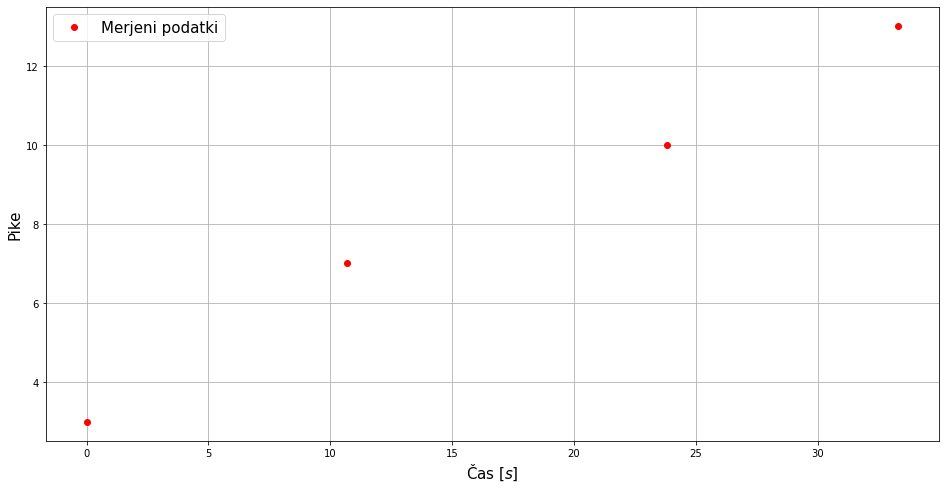

In [41]:
# Sedaj lahko narišemo graf.

plt.figure(figsize=(16, 8))
plt.plot(Casi, Pike, 'ro', label='Merjeni podatki')
plt.xlabel('Čas [$s$]', fontsize=15)
plt.ylabel('Pike', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

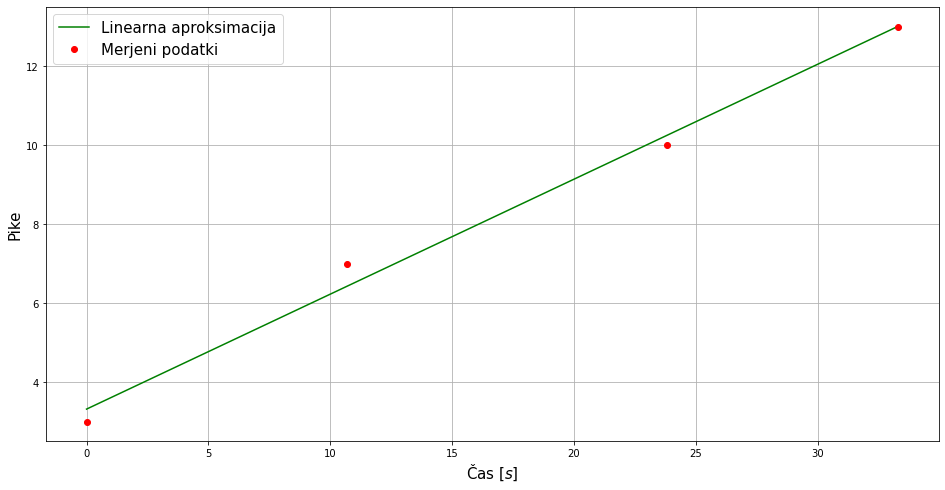

In [42]:
# Bomo uporabili numpy.polyfit in numpy.poly1d kako bi dobili aproksimirane funkcije.
# Najprej bomo naredili linearno aproksimacijo:

K1 = np.polyfit(Casi, Pike, deg=1)
Funk_1 = np.poly1d(K1)

# Naredimo numerično polje časov tako da bomo čas razbili na 100 točk:

t, h = np.linspace(Casi[0], Casi[-1], 100, retstep=True) # Korak 'h' bom uporabil kasneje pri numeričnem odvajanju.

# Lahko je narišemo s uporabo matplotlib:

plt.figure(figsize=(16, 8))
plt.plot(t, Funk_1(t), 'g', label = 'Linearna aproksimacija')
plt.plot(Casi, Pike, 'ro', label='Merjeni podatki')
plt.grid()
plt.xlabel('Čas [$s$]', fontsize=15)
plt.ylabel('Pike', fontsize=15)
plt.legend(fontsize=15)

V primeru linearne aproksimacije vidimo da se na samem začetku vrednost ne poklapa. Zato bom tudi naredil kubično aproksimacijo da vidim ali bo ona rešila ta problem.

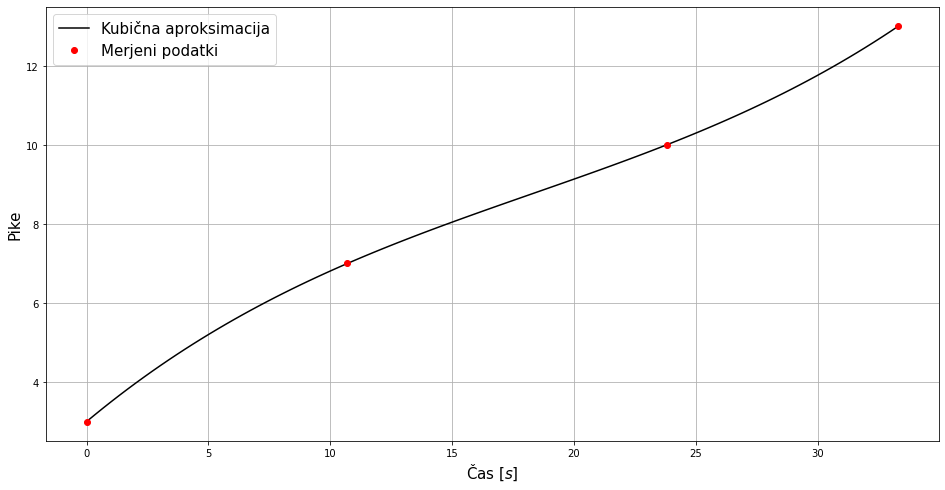

In [43]:
# Sedaj bom naredil kubično aproksimacijo:

K2 = np.polyfit(Casi, Pike, deg=3)
Funk_2 = np.poly1d(K2)

# Poglejmo graf:

plt.figure(figsize=(16, 8))
plt.plot(t, Funk_2(t), 'k', label = 'Kubična aproksimacija')
plt.plot(Casi, Pike, 'ro', label='Merjeni podatki')
plt.grid()
plt.xlabel('Čas [$s$]', fontsize=15)
plt.ylabel('Pike', fontsize=15)
plt.legend(fontsize=15)

**Vidimo da kubična aproksimacija reši ta problem.**

Sedaj ko imamo aproksimacijske funkcije lahko rešimo nalogo:

In [44]:
# Podatek sem najdel na spletu da je tekma v proseku 2h in 11min dolga.

Cas_tekme = 7860 #s

In [45]:
# S linearnom aproksimacijo pridemo do rešitve:

print(f'Za celo tekmo, če bi dosegoval točke enakim tempom, Tracy bi dosegel {Funk_1(Cas_tekme):.5} točk!')

Za celo tekmo, če bi dosegoval točke enakim tempom, Tracy bi dosegel 2291.0 točk!


In [46]:
# Kubicnom aproksimacijom pridemo do resitve:

print(f'Če uborabimo funkcijo katero smo dobili s kubično aproksimacijo, Tracy bi dosegel {Funk_2(Cas_tekme):.10} točk!')

Če uborabimo funkcijo katero smo dobili s kubično aproksimacijo, Tracy bi dosegel 143720621.6 točk!


Vidimo da v primeru ko vstavimo vrednost "Cas_tekme" v funkcijo kubične aproksimacije dobimo izjemno veliko število. Vedli smo da bo število pik veliko ampak tak veliko ni možno!

Bomo uporabili numericno odvajanje kako bi najdli približno rešitev tako da uporabimo kubično aproksimacijo!

# Integriranje/Odvajanje

Odvajanje, kot smo spoznali pri fiziki, je zelo pomembno in uporabno. V prvem letniku ko smo se ukvarjali s hitrostmi in pospeski in smo se naučili eno zelo pomembno enačbo:

$$ v=\frac{dS}{dt} $$

Do hitrosti lahko pridemo odvajanjem poti po času. Ta princip bom tudi uporabil v mojem projektu. Odvajanjem bom dobil podatek kako hitro Tracy doseže točke. Numerično odvajanje nam bo dalo te hitrosti kot numpy.array. Od teh odvodov bom najdel povprečno hitrost in je uporabil za izračun:

In [47]:
# Prvo bomo naredili numerično polje y vrednosti.

Vrednosti_funkcije2 = Funk_2(t)

# Odvod izračunamo tako da uporabimo numpy.gradient:

Odvod_funkcije2 = np.gradient(Vrednosti_funkcije2, h)
display(Odvod_funkcije2) # Vidimo numerično polje odvodov v vsaki točki.

array([0.50937058, 0.50396626, 0.49325878, 0.48275363, 0.4724508 ,
       0.4623503 , 0.45245213, 0.44275629, 0.43326277, 0.42397158,
       0.41488272, 0.40599618, 0.39731197, 0.38883009, 0.38055053,
       0.3724733 , 0.3645984 , 0.35692582, 0.34945557, 0.34218765,
       0.33512206, 0.32825879, 0.32159785, 0.31513923, 0.30888294,
       0.30282898, 0.29697735, 0.29132804, 0.28588106, 0.28063641,
       0.27559408, 0.27075408, 0.26611641, 0.26168106, 0.25744804,
       0.25341735, 0.24958899, 0.24596295, 0.24253924, 0.23931785,
       0.23629879, 0.23348206, 0.23086766, 0.22845558, 0.22624583,
       0.2242384 , 0.22243331, 0.22083054, 0.21943009, 0.21823198,
       0.21723619, 0.21644273, 0.21585159, 0.21546278, 0.2152763 ,
       0.21529214, 0.21551032, 0.21593081, 0.21655364, 0.21737879,
       0.21840627, 0.21963608, 0.22106821, 0.22270267, 0.22453945,
       0.22657857, 0.22882001, 0.23126377, 0.23390987, 0.23675829,
       0.23980904, 0.24306211, 0.24651751, 0.25017524, 0.25403

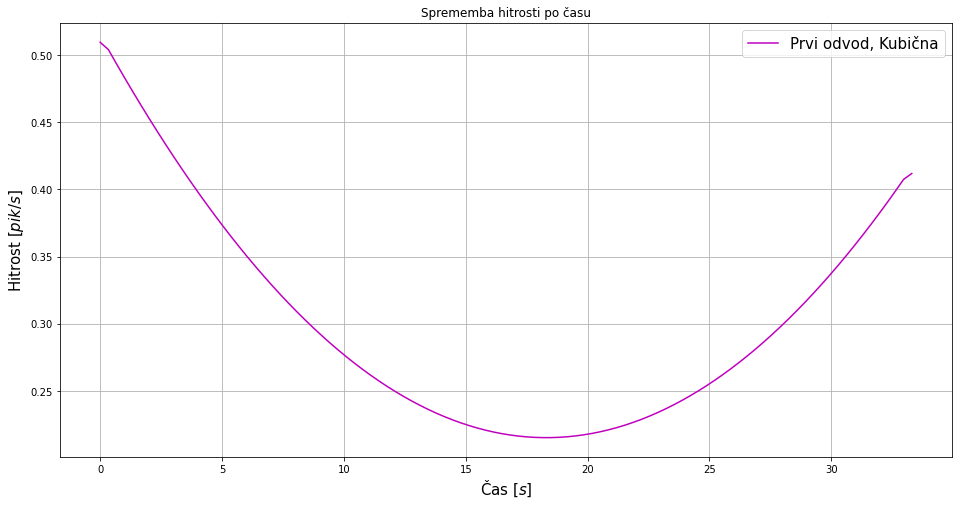

In [48]:
# Lahko predstavimo odvode na grafu:

plt.figure(figsize=(16, 8))
plt.title('Sprememba hitrosti po času')
plt.plot(t,Odvod_funkcije2, 'm', label='Prvi odvod, Kubična')
plt.grid()
plt.xlabel('Čas [$s$]', fontsize=15)
plt.ylabel('Hitrost [$pik/s$]', fontsize=15)
plt.legend(fontsize=15)

In [49]:
# Povprečno hitrost izračunamo tako:

Povprecje = Odvod_funkcije2.mean()

# In končni rezultat dobimo tako da povprečje zmnožimo s časom tekme:

Stevilo_pik = Povprecje * Cas_tekme
print(f'Če sedaj uporabimo kubično aproksimacijo in odvajanje dobimo da bi Tracy dosegel {Stevilo_pik:.5} točk!')

Če sedaj uporabimo kubično aproksimacijo in odvajanje dobimo da bi Tracy dosegel 2373.0 točk!


In [50]:
# Lahko tudi najdemo odvod linearne funkcije:

Vrednosti_funkcije1 = Funk_1(t)
Odvod_funkcije1 = np.gradient(Vrednosti_funkcije1, h)
display(Odvod_funkcije1) # Vidimo da je v vsaki točki enak odvod. To je prav ker je linearna funkcija!

array([0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105072,
       0.29105072, 0.29105072, 0.29105072, 0.29105072, 0.29105

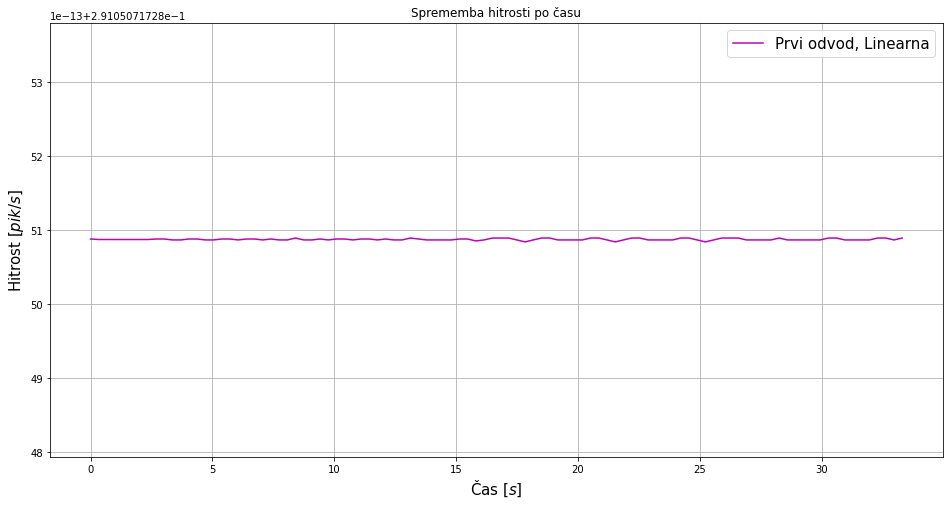

In [51]:
# Lahko sedaj izrišemo graf:

plt.figure(figsize=(16, 8))
plt.title('Sprememba hitrosti po času')
plt.plot(t,Odvod_funkcije1, 'm', label='Prvi odvod, Linearna')
plt.grid()
plt.xlabel('Čas [$s$]', fontsize=15)
plt.ylabel('Hitrost [$pik/s$]', fontsize=15)
plt.legend(fontsize=15)

**Zgoraj v array-u vidimo da so nam cse stevilke enake ampak dejansko to ni res. Ko narišemo graf vidimo da pri naših odvodov imamo šum!**

Vidimo da smo dobili zelo podobne podatke ko smo uporabili linearno in kubično aproksimacijo. Lahko jih predstavimo v enostavni tabeli:

In [52]:
Aproksimacija = {'Aproksimacija': ['Linearna','Kubična'],
        'Število pik': [Funk_1(Cas_tekme),Stevilo_pik],
        }

Tabela2 = pd.DataFrame(Aproksimacija, columns = ['Aproksimacija', 'Število pik'])
display(Tabela2)

,Aproksimacija,Število pik
0,Linearna,2290.975328
1,Kubična,2372.958100


**Najvecje število točk v eni tekmi je dosegal Wilt Chamberlain in on je dosegel 100 točk. Če pogledamo koliko točk bi Tracy dosegal vidimo koliko je bilo neverjetno to kar je on naredil!**

# Diferencialne enačbe

<img src="Curry.jpg">

Steph Curry je priznan za najboljšega strelca s linije 3 točke vseh časov in se še ni niti upokojil! Če bi analiziral nekoga, seveda bi izbral njega, mojega najljubšega strelca. Na njegovem primeru si bom ogledal vse podrobnosti košarkarskega meta v tem delu mojega projekta.

V primeru meta Curry-a imamo opravka s poševnim metom. Diferencialne enačbe za poševni met so:

  $$ \ddot{x}(t)=-\frac{F_{u}*cos(\alpha)}{m};\ddot{y}(t)=-\frac{F_{u}*sin(\alpha)}{m}-g $$

Gor vidimo kako se pospeški v smeri x in y spreminjajo s časom. V teh enacbah vidimo da se pojavi sila upora katero tudi moramo opisati. Opisali je bomo na naslednji način:

$$ F_{u}=\frac{1}{2}*\rho*v^{2}*c_{u}*A $$

Moramo še 2 dodatni enačbi napisati kako bi naša naloga bila do konca definirana in lahko začnemo s reševanjem:

$$ v=\sqrt{\dot{x}^{2}+\dot{y}^{2}} ; \alpha=\arctan(\frac{\dot{y}}{\dot{x}}) $$

**Začetne podatke bomo dobili analizom slike meta, na koncu te naloge bomo dobili iskano vrednost!**

<img src="Curry1.jpg">

Sa slike lahko preberemo da imamo začetno hitrost meta, začetni kot meta in začetno višino meta. Vse podatke lahko zapišemo spodaj:

In [53]:
# Kot je potrebno spremeniti v radiane in to bom najprej naredil.

alpha_stopinj = 51.89 #°
alpha0 = alpha_stopinj * (np.pi/180) #rad

# Drugi podatki.

g = 9.81 #m/s^2
h_0 = 3.048 #m
v0 = 8.552 #m/s
m = 0.6237 #kg  Uporabili smo ta podatek tudi pri simbolnem resevanju. 
ro = 1.225 #kg/m^3  Gostota zraka.
c_u = 0.54 #/   Zračni upor žoge, odčitan iz: Identification of basketball parameters for a simulation model; Hiroki Okuboa, Mont Hubbardb
A = (0.24/2)**2 * np.pi #m^2 Površina preseka žoge.

In [54]:
# Prvo bomo naredili seznam začetnih pogojev.

y0 = [0, np.cos(alpha0)*v0, h_0, np.sin(alpha0)*v0]

In [55]:
# Sedaj bom naredil funkcijo odvodov.

def Diferencialna(t, y, g, m, ro, c_u, A):
    
    """Funkcija katero uporabimo za izračun diferencialnih enačb.
    
Podatki katere je potrebno vstaviti:

t = Časovni interval na kateremu računamo
y = Array v katerem smo prvič zamenjali pomike in hitrosti spremenljivkama 

Koeficienti:

g = Gravitacijski pospešek
m = Masa žoge
ro = Gostota zraka
c_u = Koeficient upora
A = Površina preseka žoge


    """
    v = np.sqrt(y[1]**2 + y[3]**2)
    
    alpha = np.arctan2(y[3], y[1])
    
    F_u = 0.5 * ro * v**2 * c_u * A
    
    return np.array([y[1], -F_u*np.cos(alpha)/m, y[3], -F_u*np.sin(alpha)/m - g])

**Opazovanjem meta Curry-a na YouTube-u sem prišel do tega da je čas poreben za celoten met 1.5 sekund. Kako bi opisal met v celoti in zaradi varnosti bom čas opazovanja namestil da je 2 sekundi!**

**V tem delu projekta ne bom uporabil event kako bi končal met ko je y=0 zaradi lažje predstavitve grafov. Ta event opcija je obravnavana na koncu projekta.**

In [56]:
t_Curry = np.linspace(0, 2, 100)

In [57]:
# Uporabimo solve_ivp kako bi rešili nalogo.


Resitev_Curry = solve_ivp(lambda t, y: Diferencialna(t, y, g, m, ro, c_u, A), t_span=(t_Curry[0],t_Curry[-1]), y0=y0, t_eval = t_Curry)
Resitev_Curry.y # Tukaj so nam rešitve.

array([[  0.        ,   0.10640855,   0.2123867 ,   0.3179457 ,
          0.42309652,   0.52784988,   0.63221619,   0.73620556,
          0.83982781,   0.94309249,   1.04600883,   1.14858577,
          1.25083197,   1.35275577,   1.45436524,   1.55566816,
          1.65667199,   1.75738392,   1.85781084,   1.95797153,
          2.0578839 ,   2.15754975,   2.25697071,   2.35614828,
          2.45508382,   2.55377853,   2.65223351,   2.75044968,
          2.84842785,   2.94616868,   3.0436727 ,   3.1409403 ,
          3.23797172,   3.33476707,   3.43132633,   3.52764933,
          3.62373576,   3.71958519,   3.81519702,   3.91057054,
          4.00570489,   4.10059907,   4.19525196,   4.28966227,
          4.38382859,   4.47774937,   4.57142293,   4.66484744,
          4.75802093,   4.8509413 ,   4.94360631,   5.03601357,
          5.12816057,   5.22004466,   5.31166303,   5.40301275,
          5.49409076,   5.58489383,   5.67541863,   5.76566166,
          5.8556193 ,   5.94528778,   6.

**Vidimo da nasa rešitev ima 4 stolpca in oni so: pomik v x smeri, hitrost v x smeri, pomik v y smeri in hitrost v y smeri. Tako smo definirali numerično polje y.**

In [58]:
# Lahko vsakem stolpcu damo ime.

pomik_x, dx, pomik_y, dy = Resitev_Curry.y

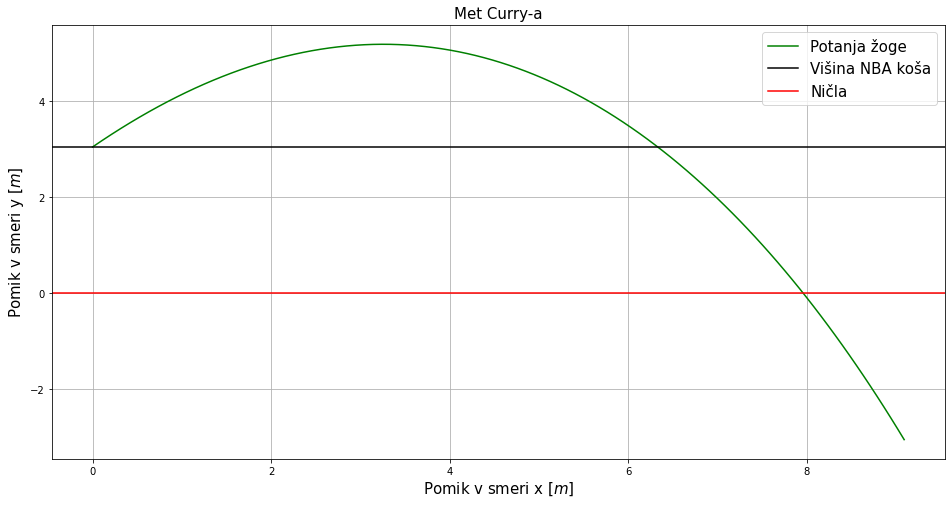

In [59]:
# Lahko sedaj izrišemo kako bo izgledal ta met:

plt.figure(figsize=(16, 8))
plt.title('Met Curry-a', fontsize=15)
plt.plot(pomik_x, pomik_y, 'g', label='Potanja žoge')
plt.xlabel('Pomik v smeri x [$m$]', fontsize=15)
plt.ylabel('Pomik v smeri y [$m$]', fontsize=15)
plt.grid()
plt.axhline(3.05, color='k', lw=1.5, label ='Višina NBA koša') # Iz podatkov sa spleta lahko odčitamo da je višina NBA koša 3.05m
plt.axhline(0, color='r', lw=1.5, label ='Ničla')
plt.legend(fontsize=15)


Uporabili smo numericne metode kako bi rešili diferencialne enačbe in iz tega smo dobili potanjo žoge. Sedaj bom uporabil drugo tehniko kako bi določil točno oddaljenost koša v x smeri od Curry-a!

# Iskanje ničel

Najprej moramo uporabiti polyfit in poly1d kako bi naredili funkcijo od podatkov katere imamo:

In [60]:
K_C = np.polyfit(pomik_x, pomik_y, deg=2)
Funk_Curry = np.poly1d(K_C)

In [61]:
# Sedaj ko imamo funkcijo lahko enostavno najdemo ničlo tako da uporabimo metodo newton.

Nicla_tla = newton(Funk_Curry, x0=8) # Za x0 smo pogledali graf zgoraj in odčitali priblizno vrednost ničle.

print(f'Žoga bo padla na tla {Nicla_tla:.3} m od začetne pozicije!')

Žoga bo padla na tla 7.94 m od začetne pozicije!


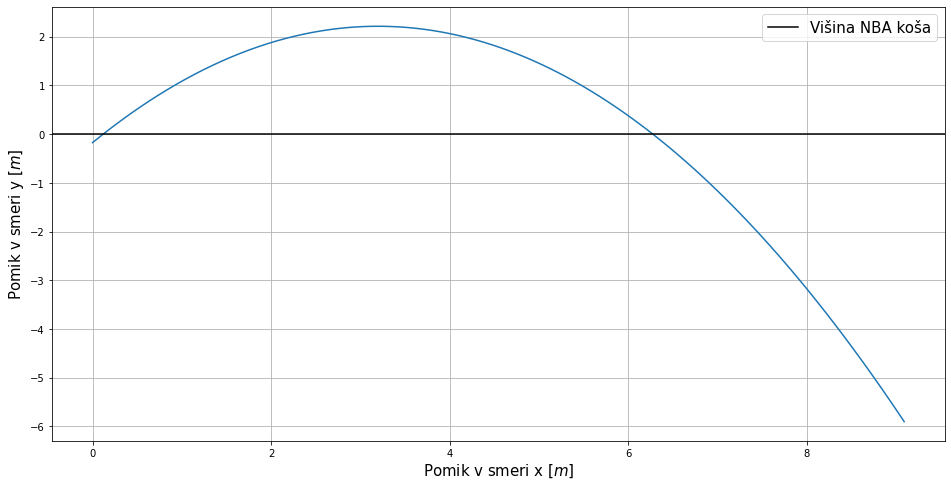

In [62]:
# Uporabom enake metode tudi lahko najdemo koliko daleč je koš od Curry-a.
# Pomaknemo funkcijo na dol za višino koša

Funk_kos = Funk_Curry - 3.05 # Višina koša v NBA-u je 3.05m

# Izrišemo graf:

plt.figure(figsize=(16, 8))
plt.plot(pomik_x, Funk_kos(pomik_x))
plt.axhline(0, color='k', lw=1.5, label ='Višina NBA koša')
plt.xlabel('Pomik v smeri x [$m$]', fontsize=15)
plt.ylabel('Pomik v smeri y [$m$]', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

In [64]:
# Sedaj izračun.

Nicla_kos = newton(Funk_kos, x0=6) # x0 smo približno odčitali sa grafa.

print(f'Koš je potrebno postavini na razdaljini {Nicla_kos:.3} m!')

Koš je potrebno postavini na razdaljini 6.28 m!


**Zgoraj vidimo da smo dobili iskano vrednost naloge!**

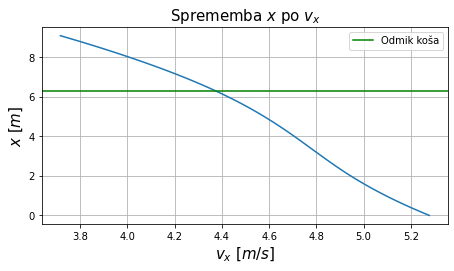

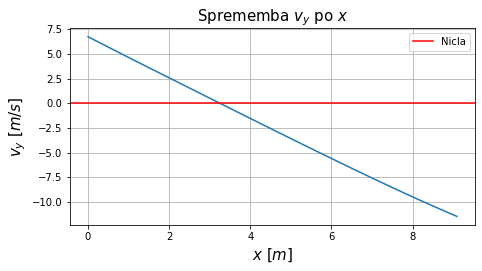

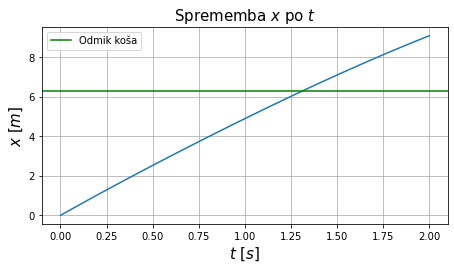

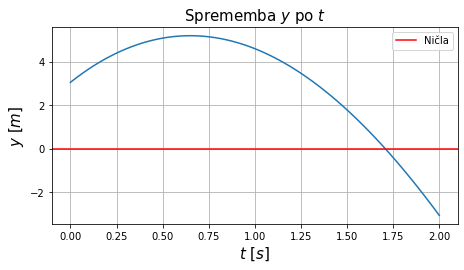

In [66]:
# Tukaj so narisani dodatni grafi. Te grafe lahko narišemo iz podatkov katere smo dobili izračunom diferencialne enacbe.



plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
plt.plot(dx, pomik_x)
plt.grid()
plt.title('Sprememba $x $ po $ v_{x} $', fontsize=15)
plt.ylabel('$ x $ [$m$]', fontsize=15)
plt.xlabel('$ v_{x} $ [$m/s$]', fontsize=15)
plt.axhline(Nicla_kos, color='g', lw=1.5, label = 'Odmik koša')
plt.legend()



plt.figure(figsize=(16, 8))
plt.subplot(2,2,2)
plt.plot(pomik_x, dy)
plt.grid()
plt.title('Sprememba $ v_{y} $ po $ x $', fontsize=15)
plt.xlabel('$ x $ [$m$]', fontsize=15)
plt.ylabel('$ v_{y} $ [$m/s$]', fontsize=15)
plt.axhline(0, color='r', lw=1.5, label = 'Nicla')
plt.legend(fontsize=10)



plt.figure(figsize=(16, 8))
plt.subplot(2,2,3)
plt.plot(t_Curry, pomik_x)
plt.grid()
plt.title('Sprememba $ x $ po $ t $', fontsize=15)
plt.xlabel('$ t $ [$s$]', fontsize=15)
plt.ylabel('$ x $ [$m$]', fontsize=15)
plt.axhline(Nicla_kos, color='g', lw=1.5, label = 'Odmik koša')
plt.legend(fontsize=10)




plt.figure(figsize=(16, 8))
plt.subplot(2,2,4)
plt.plot(t_Curry, pomik_y)
plt.grid()
plt.title('Sprememba $ y $ po $ t $', fontsize=15)
plt.xlabel('$ t $ [$s$]', fontsize=15)
plt.ylabel('$ y $ [$m$]', fontsize=15)
plt.axhline(0, color='r', lw=1.5, label = 'Ničla')
plt.legend(fontsize=10)

# NBA met

Spodaj je koda katero lahko uporabite da vidite ali je vaš met dovolj dober za NBA! V tem delu sem pri diferencialnem računu tudi uporabil event da na grafu met ne gre čez ničlo po y vrednosti.

In [67]:
def NBA_met(y_0= float(input('Vaša višina [m] = ')),
            v_0= float(input('Začetna hitrost [m/s] = ')),
            alpha_0= float(input('Kot vrženja [°] = ')),
            g=9.81,
            m = 0.6237,
            ro = 1.225,
            c_u = 0.54,
            A = (0.24/2)**2 * np.pi,
            cas_opazovanja = 3
           ):
    
    """
    Funcija katera sprejeme vaše začetne pogoje in izriše parabolo na NBA koš!
    
    """
    
    if y_0 >= 1 and y_0 <= 3 and v_0 >= 0 and v_0 <= 15 and alpha_0 >= 0 and alpha_0 <= 60: # POGOJI ZA FUNKCIJO!
        
        # Na višino je potrebno dodati še višino skoka pa dolžino roke kako bi dobili približno pozicijo lopte na začetku meta!
        
        
        Skok = 0.1778 
        Razmerje = 0.78/1.81 # Moje razmerje dolžine roke in moje višine.
        
        y1 = y_0 + Skok + (Razmerje*y_0)
        
        y_NBA = [0, np.cos(alpha_0 * (np.pi/180))*v_0, y1, np.sin(alpha_0 * (np.pi/180))*v_0]
    
        def Diferencialna(t, y, g, m, ro, c_u, A):
            
            """
            Funkcija prej definirana za izračun diferencialnih enačb
        
            """
            g=9.81
            m = 0.6237
            ro = 1.225
            c_u = 0.54
            A = (0.24/2)**2 * np.pi
        
            v = np.sqrt(y[1]**2 + y[3]**2)
    
            alpha = np.arctan2(y[3], y[1])
    
            F_u = 0.5 * ro * v**2 * c_u * A
    
            return np.array([y[1], -F_u*np.cos(alpha)/m, y[3], -F_u*np.sin(alpha)/m - g])

        t = np.linspace(0, cas_opazovanja, 100)
        tla = lambda t, y: y[2]
        tla.terminal = True

        Resitev = solve_ivp(lambda t, y: Diferencialna(t, y, g, m, ro, c_u, A), t_span=(t[0],t[-1]), y0=y_NBA, t_eval = t, events=tla)
        x, dx, y, dy = Resitev.y

        #GRAF
    
        plt.figure(figsize=(16, 8))
        plt.plot(x, y, lw = 1.5, color='k', label = 'Met žoge')
        plt.title('Poševni met žoge', fontsize=15)
        plt.xlabel('Pomik v x smeri ($m$)', fontsize=15)
        plt.ylabel('Pomik v y smeri ($m$)', fontsize=15)
        plt.plot(np.linspace(7.24-0.45,7.24,50),50*[3.05], 'o', color='#ff7f0e')
        plt.axhline(0, color='r', lw = 5)
        
        P1 = [7.24, 0]
        P2 = [7.24, 3.05]

        x_kos = [P1[0], P2[0]]

        y_kos = [P1[1], P2[1]]


        plt.plot(x_kos, y_kos, label='Koš', color='r', lw = 3)
        
        plt.grid()
        plt.legend(fontsize=10)

        
    else: # V slučaju da vaše številke niso realne!
        
        if y_0 < 1 or  y_0 > 3:
            
            raise Exception(f"Višina {y_0}m ni realna! Poskusite vrednosti med 1 pa 3!")
                
        elif v_0 < 0 or v_0 > 15:
            
            raise Exception(f"Hitrost {v_0}m/s ni realna! Poskusite vrednosti med 0 in 15!")
            
        elif alpha_0 < 0 or alpha_0 > 60:
            
            raise Exception(f"Kot {alpha_0}° ni realen! Poskusite vrednosti med 0 in 60")


    

    
    
    
interact(NBA_met)

Vaša višina [m] = 1.85
Začetna hitrost [m/s] = 9.26
Kot vrženja [°] = 47


interactive(children=(FloatSlider(value=1.85, description='y_0', max=5.550000000000001, min=-1.85), FloatSlide…

<function __main__.NBA_met(y_0=1.85, v_0=9.26, alpha_0=47.0, g=9.81, m=0.6237, ro=1.225, c_u=0.54, A=0.04523893421169302, cas_opazovanja=3)>

**FIN**